In [1]:
from nsga2.estimator import NSGAIIRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('../data/lexicase_paper/d_airfoil.txt', sep=',')

# DEAP interface requires X and y to be numpy arrays, not pandas dataframes
X = df.drop('label', axis=1).values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

estimator = NSGAIIRegressor(**{
    'pop_size'        : 40, 
    'max_gen'         : 20,
    'max_depth'       : 6,  # 8
    'max_size'        : 2**6, # 75
    'objectives'      : ['error', 'size'],
    'initialization'  : 'uniform',
    'pick_criteria'   : 'error', # error, MCDM
    'validation_size' : 0.33,
    'simplify'        : False,
    
    # Either you use smart variation (just 1 cx and 1 mutation)
    'smart_variation' : False,
    'warm_up'         : False,

    # Or you use mabs (4 mutations)
    'use_mab'         : False,
    'use_context'     : False,

    'simplification_method' : 'bottom_up',
    'simplification_tolerance' : 1e-0,
    'verbosity'       : 1,
    'survival'       : 'tournament'
}).fit(X_train, y_train)

gen	evals	best_size	best_error	n_simplifications	n_new_hashes	avg train error	avg train size	avg val error	avg val size	med train error	med train size	med val error	med val size	std train error	std train size	std val error	std val size	min train error	min train size	min val error	min val size	max train error	max train size	max val error	max val size
0  	40   	30       	-722.585  	0                	0           	               	              	             	            	               	              	             	            	               	              	             	            	               	              	             	            	               	              	             	            
1  	40   	2        	-386.199  	0                	0           	               	              	             	            	               	              	             	            	               	              	             	            	               	              	             	            	  

In [2]:
# Should not give erros even without mabs
pd.DataFrame(estimator.variator.mab.pull_history).iloc[:10]

,t,arm,reward,update,delta_error,gen
0,0,delete,0.0,0,"[-57.300264311516, -1.0]",1
1,1,cx,1.0,0,"[871.2649411614893, -2.0]",1
2,2,delete,0.0,0,"[-1217.1535919453509, -1.0]",1
3,3,subtree,1.0,0,"[inf, 6.0]",1
4,4,point,1.0,0,"[530.7892870808737, -0.0]",1
5,5,cx,0.0,0,"[-1207.6797264329252, -0.0]",1
6,6,point,1.0,0,"[110.42669625241615, -0.0]",1
7,7,cx,1.0,0,"[479.47761694614746, 2.0]",1
8,8,insert,1.0,0,"[inf, 2.0]",1
9,9,insert,1.0,0,"[15533.395054905142, -26.0]",1


In [3]:
pd.DataFrame(estimator.variator.mab.pull_history)['arm'].value_counts().sort_values()

arm
cx         143
insert     148
point      152
delete     156
subtree    161
Name: count, dtype: int64

In [4]:
pd.DataFrame(estimator.variator.mab.pull_history).groupby('arm')['reward'].value_counts().sort_values()

arm      reward
point    0.0         7
subtree  0.0         7
point    0.5         8
insert   0.5        11
delete   0.0        13
insert   0.0        14
subtree  0.5        19
cx       0.0        29
delete   0.5        49
cx       0.5        55
         1.0        59
delete   1.0        94
insert   1.0       123
subtree  1.0       135
point    1.0       137
Name: count, dtype: int64

statistics (without nans and infs)
delta error
variation
cx         0.000000e+00
delete     1.106030e-01
insert     1.050185e+04
point      1.319855e+04
subtree    1.860289e+07
Name: delta error, dtype: float64


/home/guilherme/anaconda3/envs/hashing-experiments/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/guilherme/anaconda3/envs/hashing-experiments/lib/python3.12/site-packages/matplotlib/cbook.py:1267: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/guilherme/anaconda3/envs/hashing-experiments/lib/python3.12/site-packages/matplotlib/cbook.py:1274: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/guilherme/anaconda3/envs/hashing-experiments/lib/python3.12/site-packages/matplotlib/cbook.py:1283: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


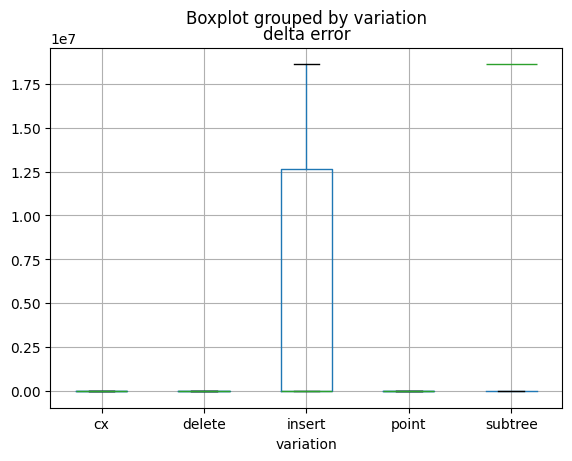

----------------------------------------
delta size
variation
cx         0.0
delete    -2.0
insert     1.0
point      0.0
subtree    5.0
Name: delta size, dtype: float64


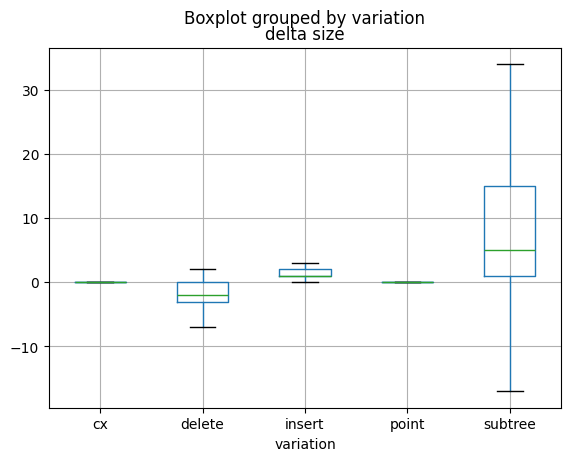

----------------------------------------
euclid dist prediction
variation
cx         0.005315
delete     1.697399
insert     1.697840
point      3.395456
subtree    1.697858
Name: euclid dist prediction, dtype: float64


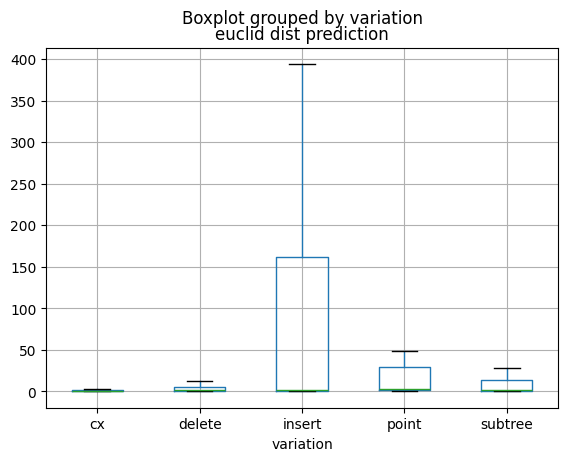

----------------------------------------


In [5]:
import matplotlib.pyplot as plt

variation_log = pd.DataFrame(estimator.variator.log)

print("statistics (without nans and infs)")
for col in ['delta error', 'delta size', 'euclid dist prediction']:
    print(col)
    print(variation_log
            .groupby('variation')[col]
            # .apply (lambda c: np.nanmean(c.replace([np.inf, -np.inf], np.nan).dropna()) )
            .apply (lambda c: np.nanmedian(c) )
            # .sort_values()
    )

    variation_log.boxplot(column=col, by='variation', showfliers=False)
    plt.show()
    
    print('-'*40)

,gen,variation,euclid dist prediction,delta error,delta size
0,1,delete,0.351976,-5.730026e+01,-1.0
1,1,cx,0.010497,8.712649e+02,-2.0
2,1,delete,27.585462,-1.217154e+03,-1.0
3,1,subtree,NaN,inf,6.0
4,1,point,0.009124,5.307893e+02,-0.0
...,...,...,...,...,...
755,19,delete,NaN,inf,-2.0
756,19,point,NaN,inf,-0.0
757,19,cx,5.438093,8.541645e+04,-0.0
758,19,point,NaN,inf,-0.0


delete


/tmp/ipykernel_86121/900576179.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data[col] > 2e+1] = np.nan


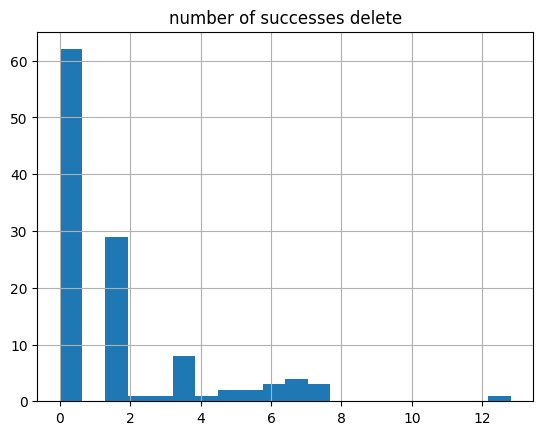

cx


/tmp/ipykernel_86121/900576179.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data[col] > 2e+1] = np.nan


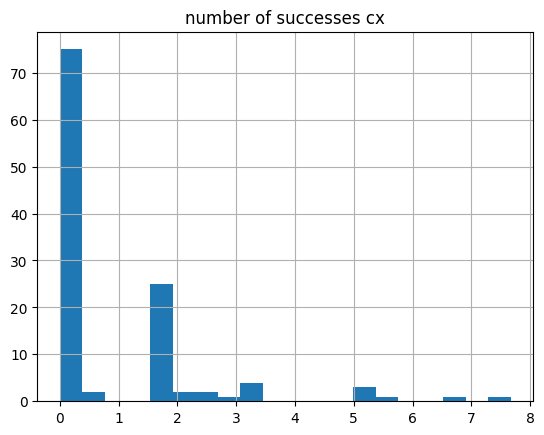

subtree


/tmp/ipykernel_86121/900576179.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data[col] > 2e+1] = np.nan


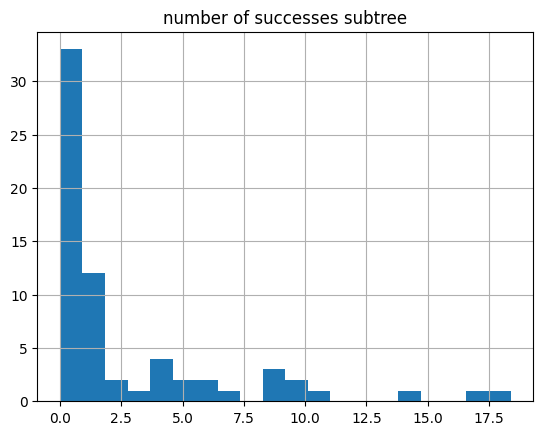

point


/tmp/ipykernel_86121/900576179.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data[col] > 2e+1] = np.nan


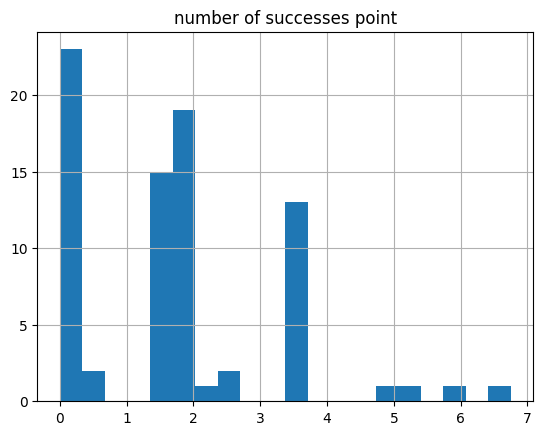

insert


/tmp/ipykernel_86121/900576179.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data[col] > 2e+1] = np.nan


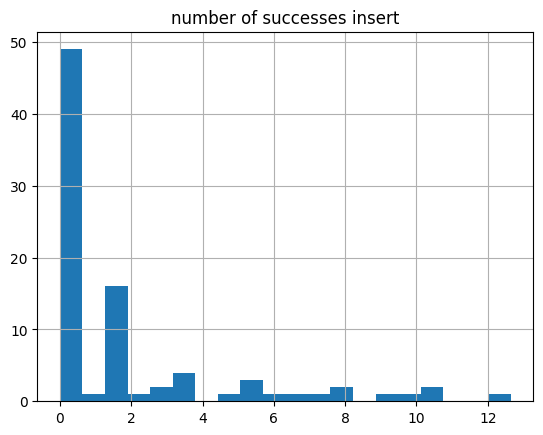

In [6]:
variation_log = pd.DataFrame(estimator.variator.log)

col = 'euclid dist prediction'
    
display(variation_log)
for mut in variation_log['variation'].unique():
    print(mut)

    data = variation_log[variation_log['variation']==mut]
    
    data[data[col] > 2e+1] = np.nan

    data = data.dropna()
    data['positive'] = data['delta error'] < -1e-6
    data.hist(column=col, bins=20)
    plt.title(f"number of successes {mut}")
    plt.show()

In [7]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

model      = str(estimator.best_estimator_).replace("ARG", "x_")
size       = len(estimator.best_estimator_)
complexity = size
depth      = estimator.best_estimator_.height

print(model)
print(size)
print(complexity)
print(depth)

for metric, fn, (data_X, data_y) in [
    ('train_r2',  r2_score, (X_train, y_train)),
    ('test_r2',   r2_score, (X_test,  y_test )),
    ('train_mse', mse,      (X_train, y_train)),
    ('test_mse',  mse,      (X_test,  y_test )),
]:
    score = np.nan
    try:
        score = fn(estimator.predict(data_X), data_y)
        print(f"{metric} : {score}")
    except ValueError:
        print(f"(Failed to calculate {metric}")

for ind in estimator.archive_:
    print(ind.fitness, ind)

sqrt(add3(add(x_3, 503752.92288972), -488273.1622732532, x_3))
7
7
3
train_r2 : -3005.9433390745035
test_r2 : -3164.4206755153746
train_mse : 46.55271205033894
test_mse : 49.78084749452139
(45.998407236264576, 14.0) sqrt(add3(add(add(ARG3, add3(-79012.2401371501, ARG3, ARG3)), 964870.6122712175), add(ARG3, -870530.1325012051), ARG3))
(46.08274891590775, 12.0) sqrt(add3(add(add(ARG3, add3(783907.7597955139, ARG3, ARG3)), 486187.373438921), -1254716.4584119036, ARG3))
(46.274365523547296, 7.0) sqrt(add3(add(ARG3, 503752.92288972), -488273.1622732532, ARG3))


In [8]:
if False:
    print( len(list(estimator.simplifier.pop_hash.keys())) )

    n_keys =  len(list(estimator.simplifier.pop_hash.keys()))

    for key in list(estimator.simplifier.pop_hash.keys())[:n_keys]:
        print(key)
        for ind in estimator.simplifier.pop_hash[key]:
            print(" -", ind)

In [9]:
if True:
    print( len(list(estimator.variator.variator_.pop_hash.keys())) )

    n_keys =  len(list(estimator.variator.variator_.pop_hash.keys()))

    for key in list(estimator.variator.variator_.pop_hash.keys())[:n_keys]:
        print(key)
        for ind in estimator.variator.variator_.pop_hash[key]:
            print(" -", ind)

AttributeError: 'Variator' object has no attribute 'variator_'

In [ ]:
display(df.describe())

A = np.maximum(df['x0'], df['x4']+29.657).values
B = df['x4'].values

print(np.std(A) * (A - np.mean(A))[:5])
print(np.std(B) * (B - np.mean(B))[:5])